# Ecobici Analisis

In [28]:
import pandas as pd

df = pd.read_csv('2025-04.zip', compression='zip')

df.head(5)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,F,22.0,2586485,107-108,31/03/2025,23:34:46,181,01/04/2025,00:00:12
1,M,50.0,8152522,384,31/03/2025,23:43:51,387,01/04/2025,00:00:16
2,M,24.0,4219945,021,31/03/2025,23:42:36,548,01/04/2025,00:00:23
3,M,32.0,2286540,271-272,31/03/2025,23:57:16,450,01/04/2025,00:00:31
4,M,26.0,5017868,538,31/03/2025,23:46:23,012,01/04/2025,00:00:31


In [31]:
print(f"Forma del DataFrame: {df.shape}")
print("Tipos de datos en el DataFrame:")
print(df.dtypes)

Forma del DataFrame: (1727987, 12)
Tipos de datos en el DataFrame:
Genero_Usuario                   object
Edad_Usuario                    float64
Bici                              int64
Ciclo_Estacion_Retiro            object
Fecha_Retiro                     object
Hora_Retiro                      object
Ciclo_EstacionArribo             object
Fecha_Arribo                     object
Hora_Arribo                      object
fecha_hora_retiro        datetime64[ns]
fecha_hora_arribo        datetime64[ns]
duracion_minutos                float64
dtype: object


In [30]:
# Creación de la columna 'duracion_minutos'
if 'Fecha_Retiro' in df.columns and 'Hora_Retiro' in df.columns and 'Fecha_Arribo' in df.columns and 'Hora_Arribo' in df.columns:
    fecha_retiro_str = df['Fecha_Retiro'].astype(str)
    hora_retiro_str = df['Hora_Retiro'].astype(str)
    fecha_arribo_str = df['Fecha_Arribo'].astype(str)
    hora_arribo_str = df['Hora_Arribo'].astype(str)

    df['fecha_hora_retiro'] = pd.to_datetime(fecha_retiro_str + ' ' + hora_retiro_str, dayfirst=True)
    df['fecha_hora_arribo'] = pd.to_datetime(fecha_arribo_str + ' ' + hora_arribo_str, dayfirst=True)
    df['duracion_minutos'] = (df['fecha_hora_arribo'] - df['fecha_hora_retiro']).dt.total_seconds() / 60

df.head(5)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,fecha_hora_retiro,fecha_hora_arribo,duracion_minutos
0,F,22.0,2586485,107-108,31/03/2025,23:34:46,181,01/04/2025,00:00:12,2025-03-31 23:34:46,2025-04-01 00:00:12,25.433333
1,M,50.0,8152522,384,31/03/2025,23:43:51,387,01/04/2025,00:00:16,2025-03-31 23:43:51,2025-04-01 00:00:16,16.416667
2,M,24.0,4219945,021,31/03/2025,23:42:36,548,01/04/2025,00:00:23,2025-03-31 23:42:36,2025-04-01 00:00:23,17.783333
3,M,32.0,2286540,271-272,31/03/2025,23:57:16,450,01/04/2025,00:00:31,2025-03-31 23:57:16,2025-04-01 00:00:31,3.250000
4,M,26.0,5017868,538,31/03/2025,23:46:23,012,01/04/2025,00:00:31,2025-03-31 23:46:23,2025-04-01 00:00:31,14.133333


In [32]:
def categorizar_duracion(minutos):
    if minutos <= 15:
        return 'Corto'
    elif minutos <= 30:
        return 'Medio'
    else:
        return 'Largo'
    
if 'duracion_minutos' in df.columns:
    df['categoria_duracion'] = df['duracion_minutos'].apply(categorizar_duracion)
    print(df['categoria_duracion'].value_counts())

categoria_duracion
Corto    1052886
Medio     493360
Largo     181741
Name: count, dtype: int64


In [33]:
# Limpieza~ de outliers (viajes > 120 minutos, edades negativas o extremas)
df_cleaned = df[
	(df['duracion_minutos'] <= 120) &
	(df['duracion_minutos'] > 0) &
	(df['Edad_Usuario'] > 0) &
	(df['Edad_Usuario'] < 90)
]
display(df_cleaned.head(5))
print(f"{len(df) - len(df_cleaned)} registros removidos como outliers")

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,fecha_hora_retiro,fecha_hora_arribo,duracion_minutos,categoria_duracion
0,F,22.0,2586485,107-108,31/03/2025,23:34:46,181,01/04/2025,00:00:12,2025-03-31 23:34:46,2025-04-01 00:00:12,25.433333,Medio
1,M,50.0,8152522,384,31/03/2025,23:43:51,387,01/04/2025,00:00:16,2025-03-31 23:43:51,2025-04-01 00:00:16,16.416667,Medio
2,M,24.0,4219945,021,31/03/2025,23:42:36,548,01/04/2025,00:00:23,2025-03-31 23:42:36,2025-04-01 00:00:23,17.783333,Medio
3,M,32.0,2286540,271-272,31/03/2025,23:57:16,450,01/04/2025,00:00:31,2025-03-31 23:57:16,2025-04-01 00:00:31,3.250000,Corto
4,M,26.0,5017868,538,31/03/2025,23:46:23,012,01/04/2025,00:00:31,2025-03-31 23:46:23,2025-04-01 00:00:31,14.133333,Corto


1517 registros removidos como outliers


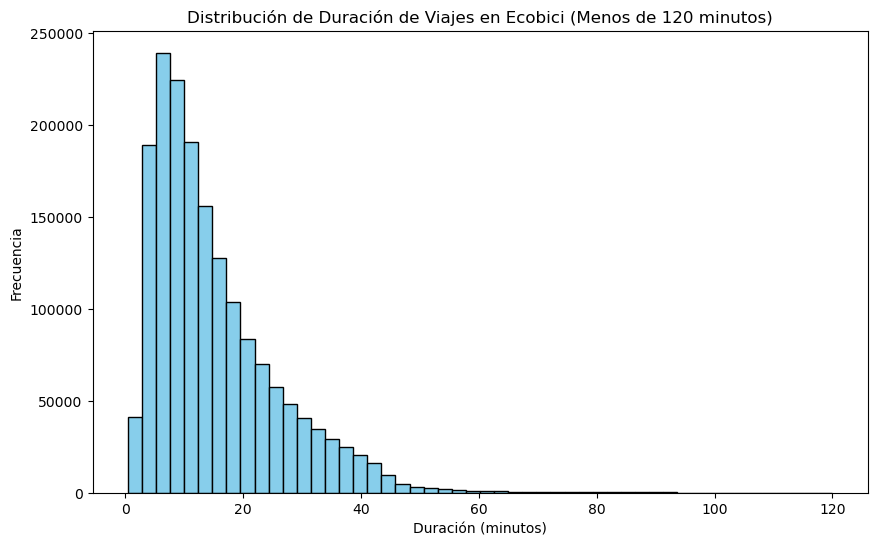

In [34]:
import matplotlib.pyplot as plt

# Creamos histograma con los viajes que duran menos de 120 minutos
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['duracion_minutos'],
            bins=50, 
            color='skyblue', 
            edgecolor='black')
plt.title('Distribución de Duración de Viajes en Ecobici (Menos de 120 minutos)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

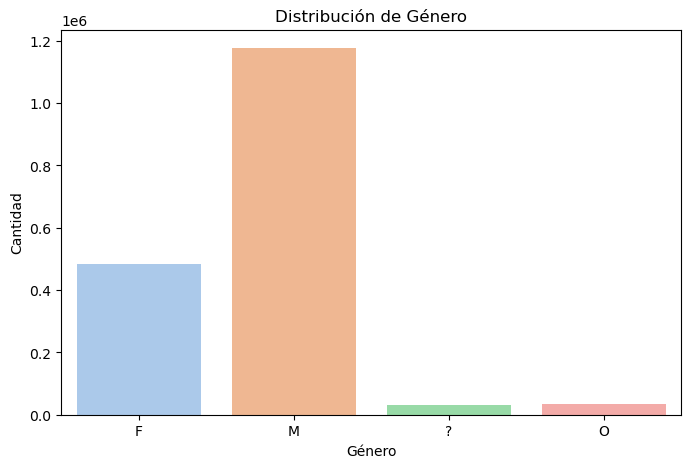

In [35]:
import seaborn as sns

# Gráfica de barras para el género de los usuarios
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Genero_Usuario', palette='pastel', hue='Genero_Usuario')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

In [36]:
# Limpieza de la columna de género (renombrar valores ? a Otro)
df_cleaned['Genero_Usuario'] = df_cleaned['Genero_Usuario'].replace('?', 'O')

C:\Users\Orlando\AppData\Local\Temp\ipykernel_39648\1489381492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genero_Usuario'] = df_cleaned['Genero_Usuario'].replace('?', 'O')


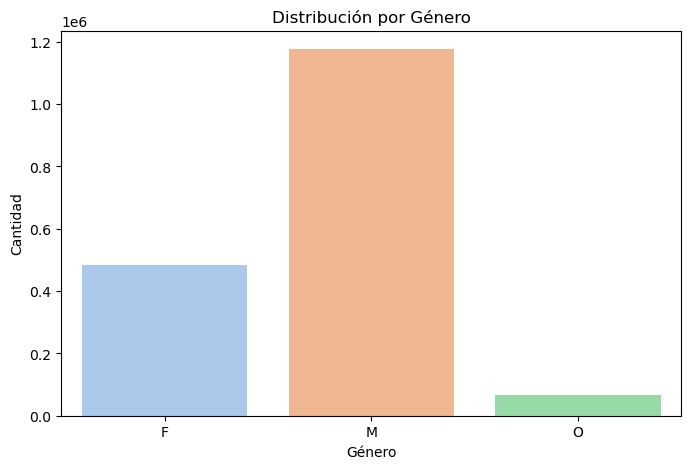

In [37]:
# Gráfica de barras para el género de los usuarios (con los valores limpios)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned,
            x="Genero_Usuario",
            palette='pastel',
            hue='Genero_Usuario')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

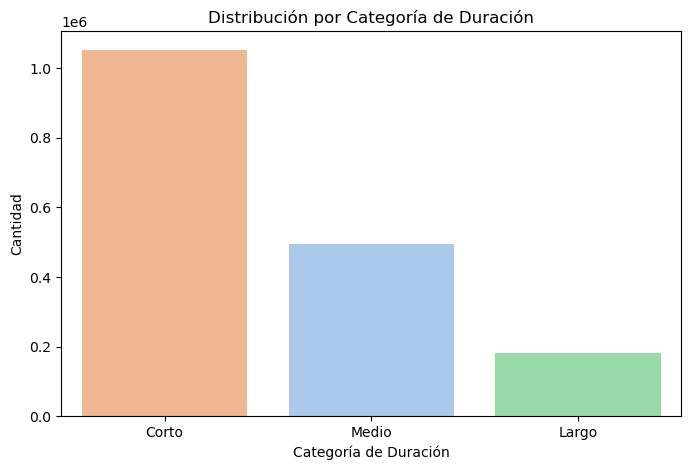

In [38]:
# Gráfica de barras por categoría de duración
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned,
            x="categoria_duracion",
            palette='pastel',
            hue='categoria_duracion',
            order=['Corto', 'Medio', 'Largo'])
plt.title('Distribución por Categoría de Duración')
plt.xlabel('Categoría de Duración')
plt.ylabel('Cantidad')
plt.show()

# Generación de predicción

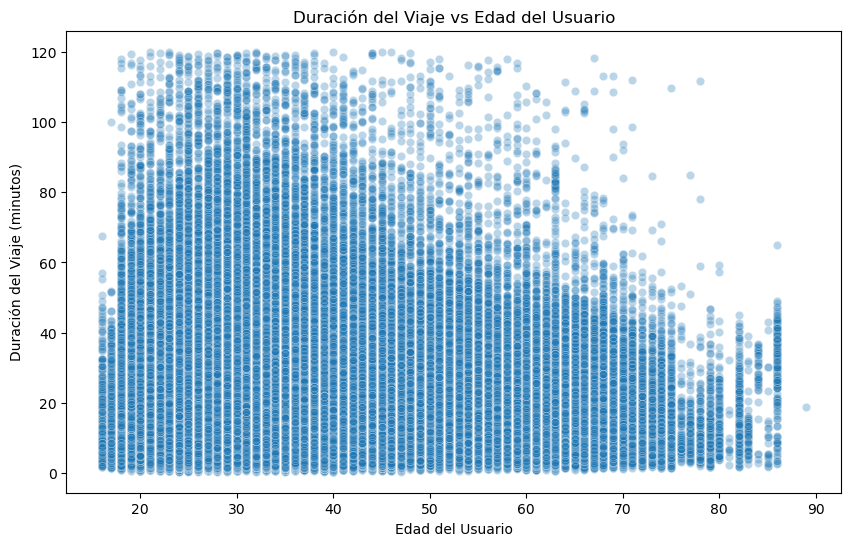

In [48]:
# Gráfica de dispersión (scatter plot) de duración vs edad
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Edad_Usuario'], y=df_cleaned['duracion_minutos'], alpha=0.3)
plt.title('Duración del Viaje vs Edad del Usuario')
plt.xlabel('Edad del Usuario')
plt.ylabel('Duración del Viaje (minutos)')
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Predicción con base a la edad y género del usuario
# Preparación de datos
X = df_cleaned[['Edad_Usuario', 'Genero_Usuario']]
X = pd.get_dummies(X, columns=['Genero_Usuario'], drop_first=True)
y = df_cleaned['duracion_minutos']

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Métricas de evaluación del modelo
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutos")

# Métrica R²
r2 = model.score(X, y)
print(f"R²: {r2:.4f}")

# Coeficientes del modelo
print(f"Coeficiente de Edad_Usuario: {model.coef_[0]:.4f}")

# Tabla de Predicción vs valores reales
pred_vs_real = pd.DataFrame({'Valor Real': y, 'Predicción': y_pred})
display(pred_vs_real.head(10))

Root Mean Squared Error (RMSE): 10.88 minutos
R²: 0.0017
Coeficiente de Edad_Usuario: -0.0041


,Valor Real,Predicción
0,25.433333,15.705853
1,16.416667,14.823634
2,17.783333,14.930993
3,3.250000,14.897960
4,14.133333,14.922735
5,18.900000,14.939252
6,10.400000,14.897960
7,13.450000,14.914476
8,5.800000,14.918606
9,8.716667,14.910347


C:\Users\Orlando\AppData\Local\Temp\ipykernel_39648\3248907119.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


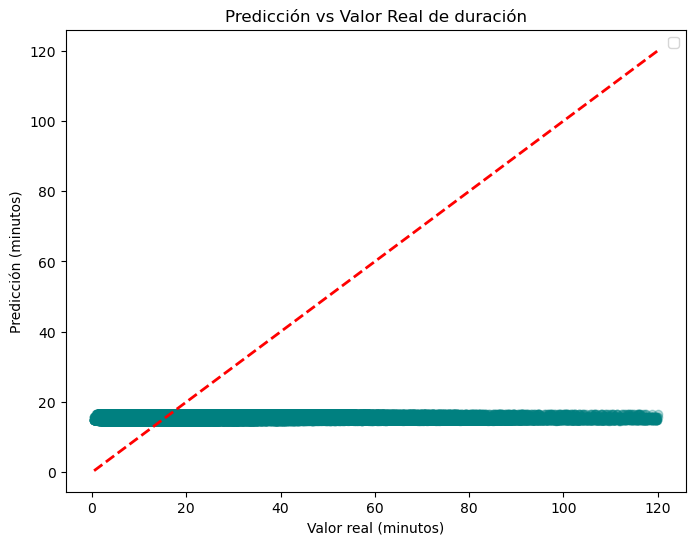

In [50]:
# Gráfica de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.3, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Valor real (minutos)')
plt.ylabel('Predicción (minutos)')
plt.title('Predicción vs Valor Real de duración')
plt.legend()
plt.show()

In [ ]:
# Guardar el DataFrame limpio a un nuevo archivo CSV
nombre_archivo = 'ecobici_cleaned.csv'
if not df_cleaned.empty:
    try:
        df_cleaned.to_csv(nombre_archivo, index=False)
    except Exception as e:
        print(f"Error al guardar el archivo: {nombre_archivo}")  